## **Part 1 :  Exploratory Data Analysis**

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Read data
path = '01 - Data/ecom customer_data.xlsx'
# Read Data into a DataFrame
df = pd.read_excel(path)

## ***Data Cleaning 🧹🧹***

​	✅Handle Empty Rows

​	✅Handle Duplicated Rows

In [2]:
# ------------------------------------------------------------------
# HANDLE NULLS IN THE GENDER COLUMN
# ------------------------------------------------------------------

# Check NULLS in the DF
# df.isnull().sum()

# Check Duplicated Rows
# df.duplicated().sum()

# Fill NULLS in this new copy with new values
df['Gender'] = df['Gender'].fillna('No Gender')

# Check Filled NULLS
# df['Gender'].unique()

## ***Data Exploration 🔬🔬***

​	✅Gender Distribution Count plots

​	✅Order Distribution

​	✅Gender Distribution in each Gender

​	✅Correlogram Plot

​	✅Top 10 Purchasing Customers

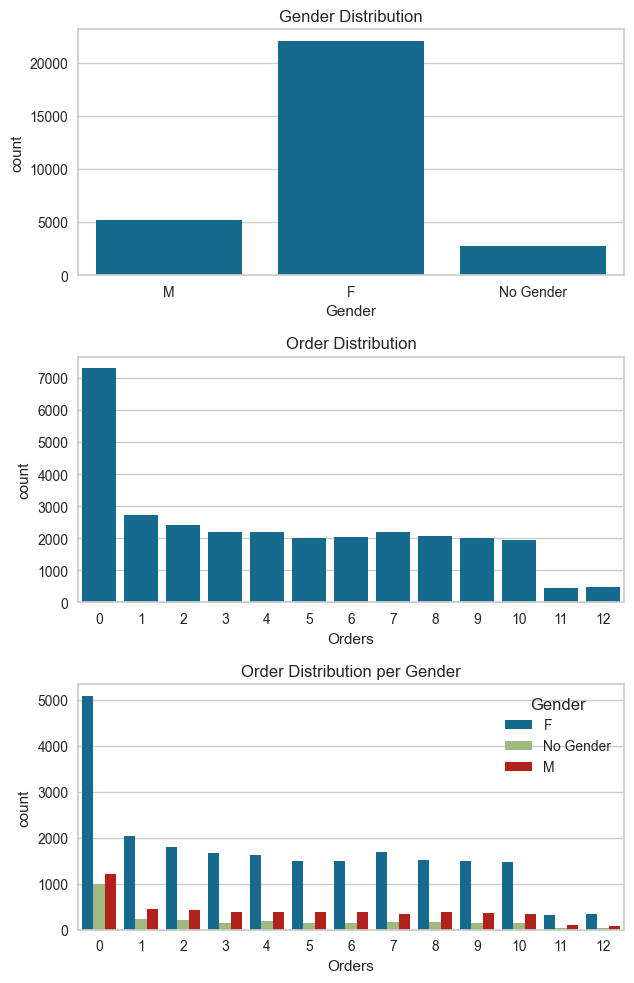

In [3]:
# Set Figure size
plt.figure(figsize = (6.5, 10))

# Plot Gender Distribution
plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'Gender')
plt.title('Gender Distribution')

# Plot Order Distribution
plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'Orders')
plt.title('Order Distribution')

# Plot Gender Distribution in each Order
plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'Orders', hue = 'Gender')
plt.title('Order Distribution per Gender')

plt.tight_layout()
plt.show()

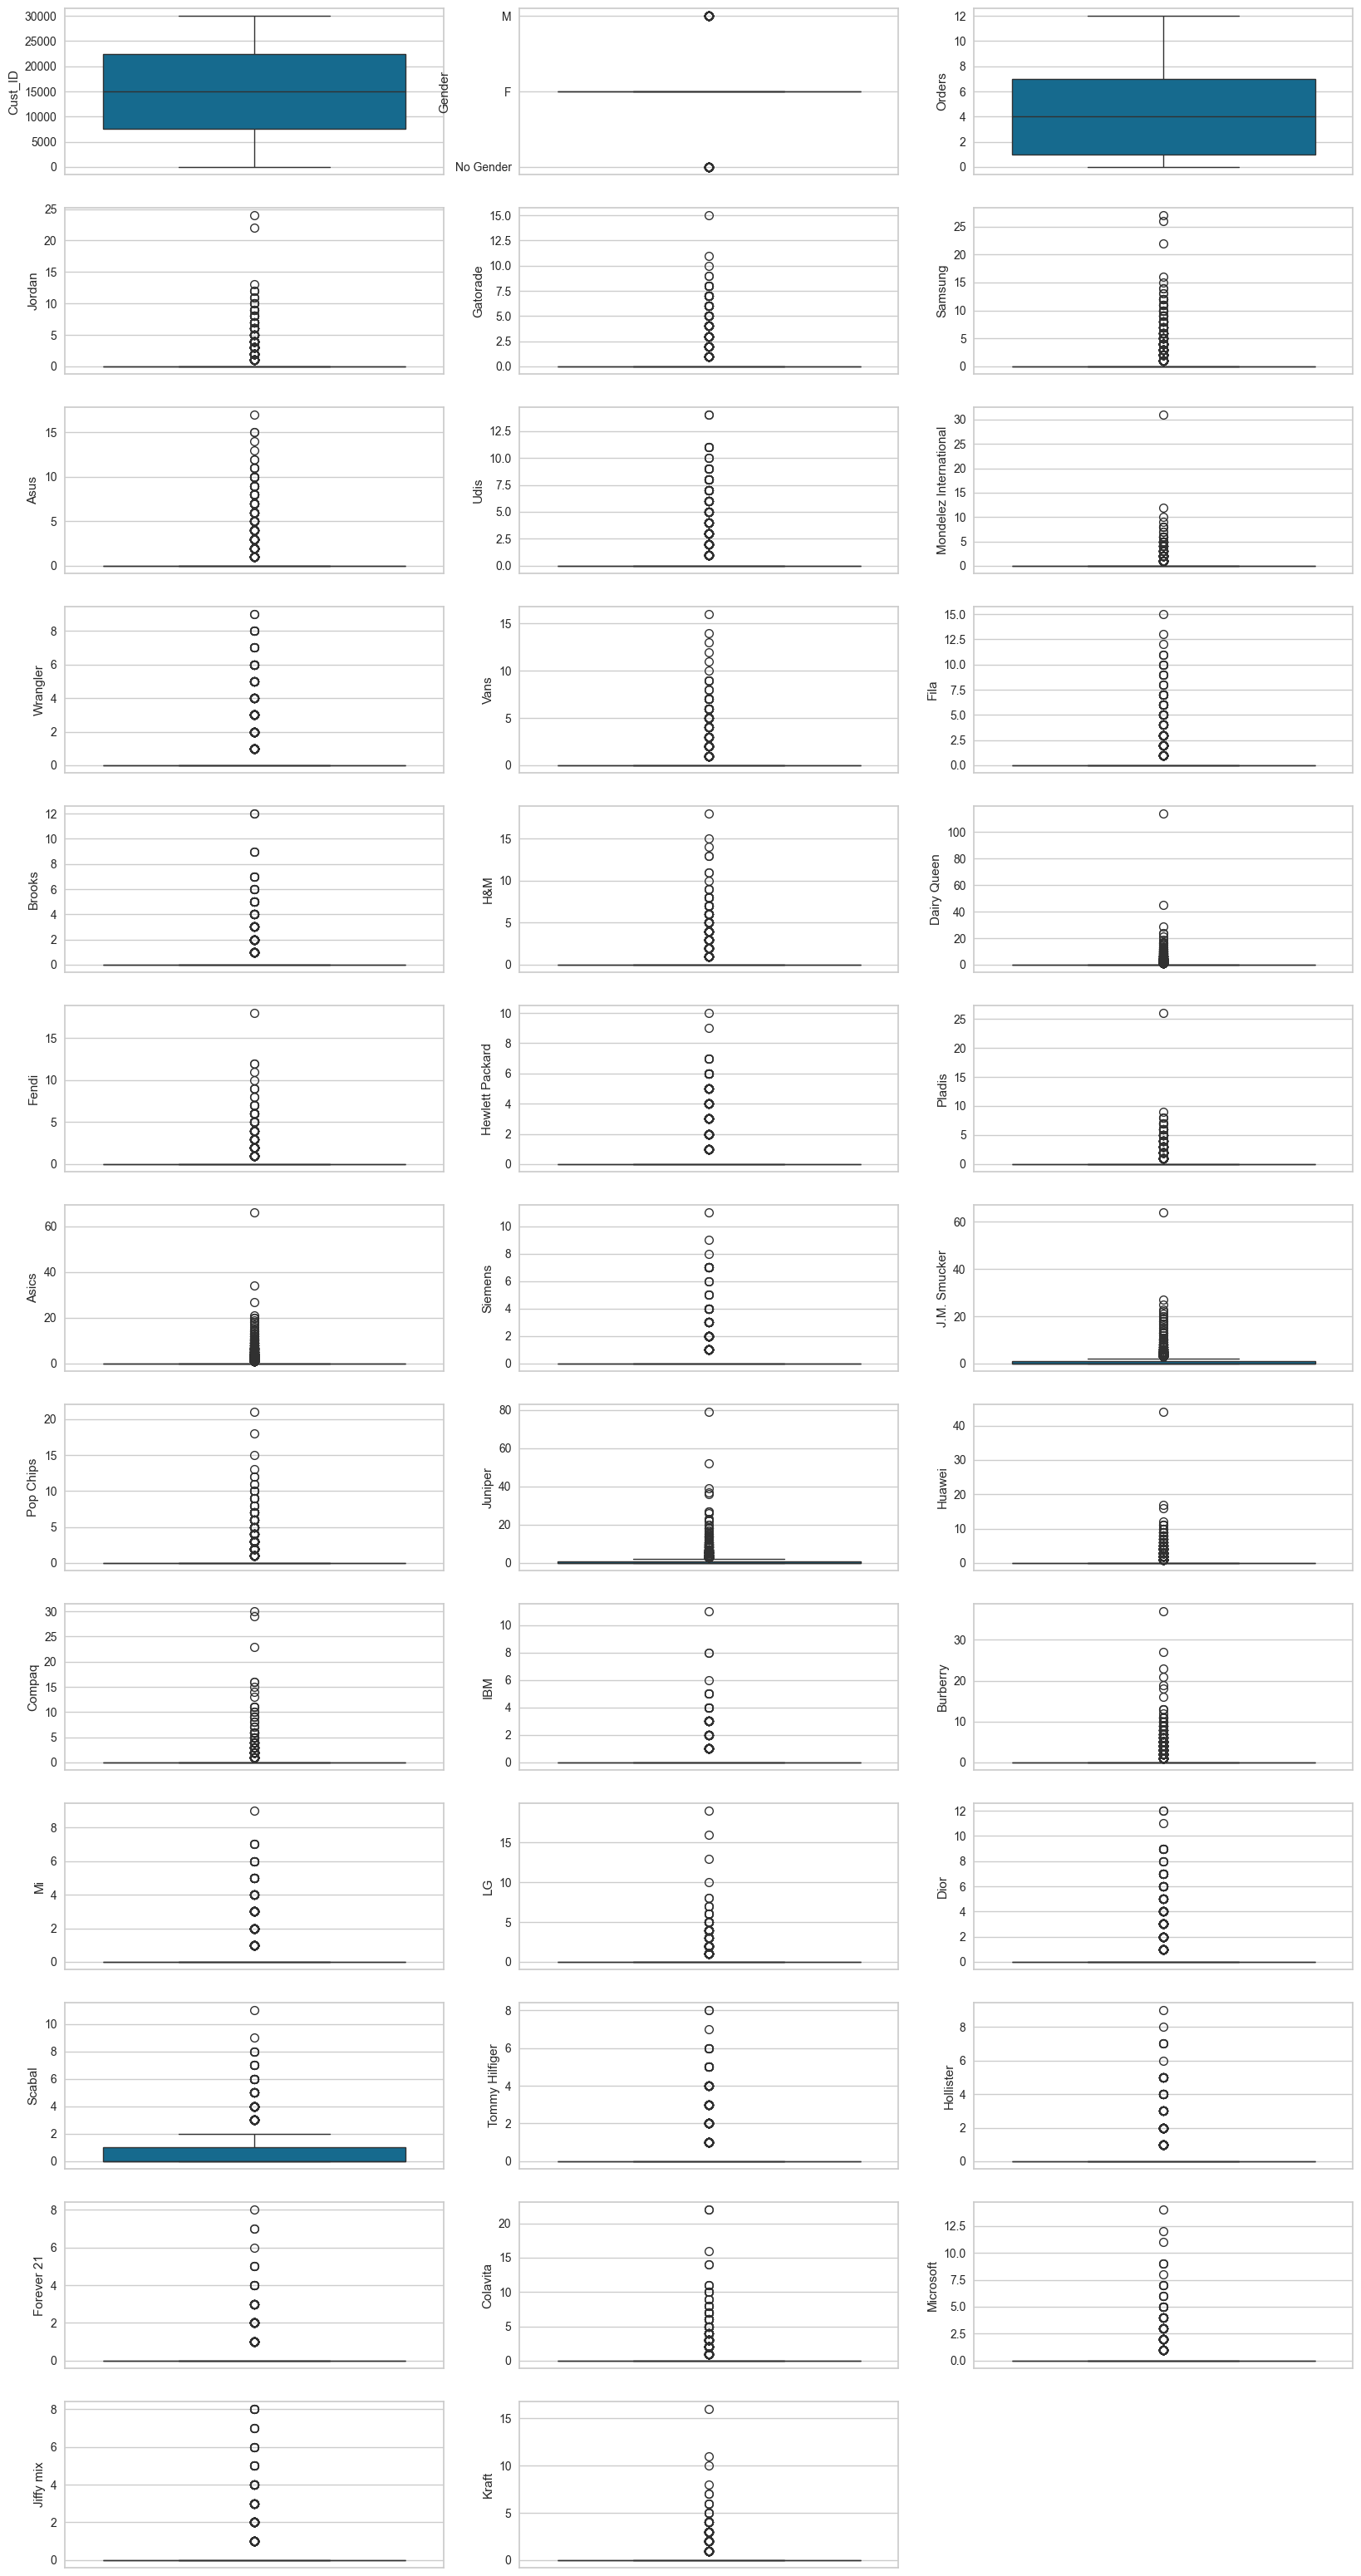

<Figure size 800x550 with 0 Axes>

In [4]:
# ------------------------------------------------------------------
# BOX PLOTS
# ------------------------------------------------------------------


def dist_list(lst):
    plt.figure(figsize = (20, 40))
    
    # Box Plots for each column by iteration
    for i, col in enumerate(lst, 1):
        plt.subplot(13,3,i)
        sns.boxplot(data = df, y = df[col])
    
    plt.show()
    plt.tight_layout()

dist_list(df.columns)

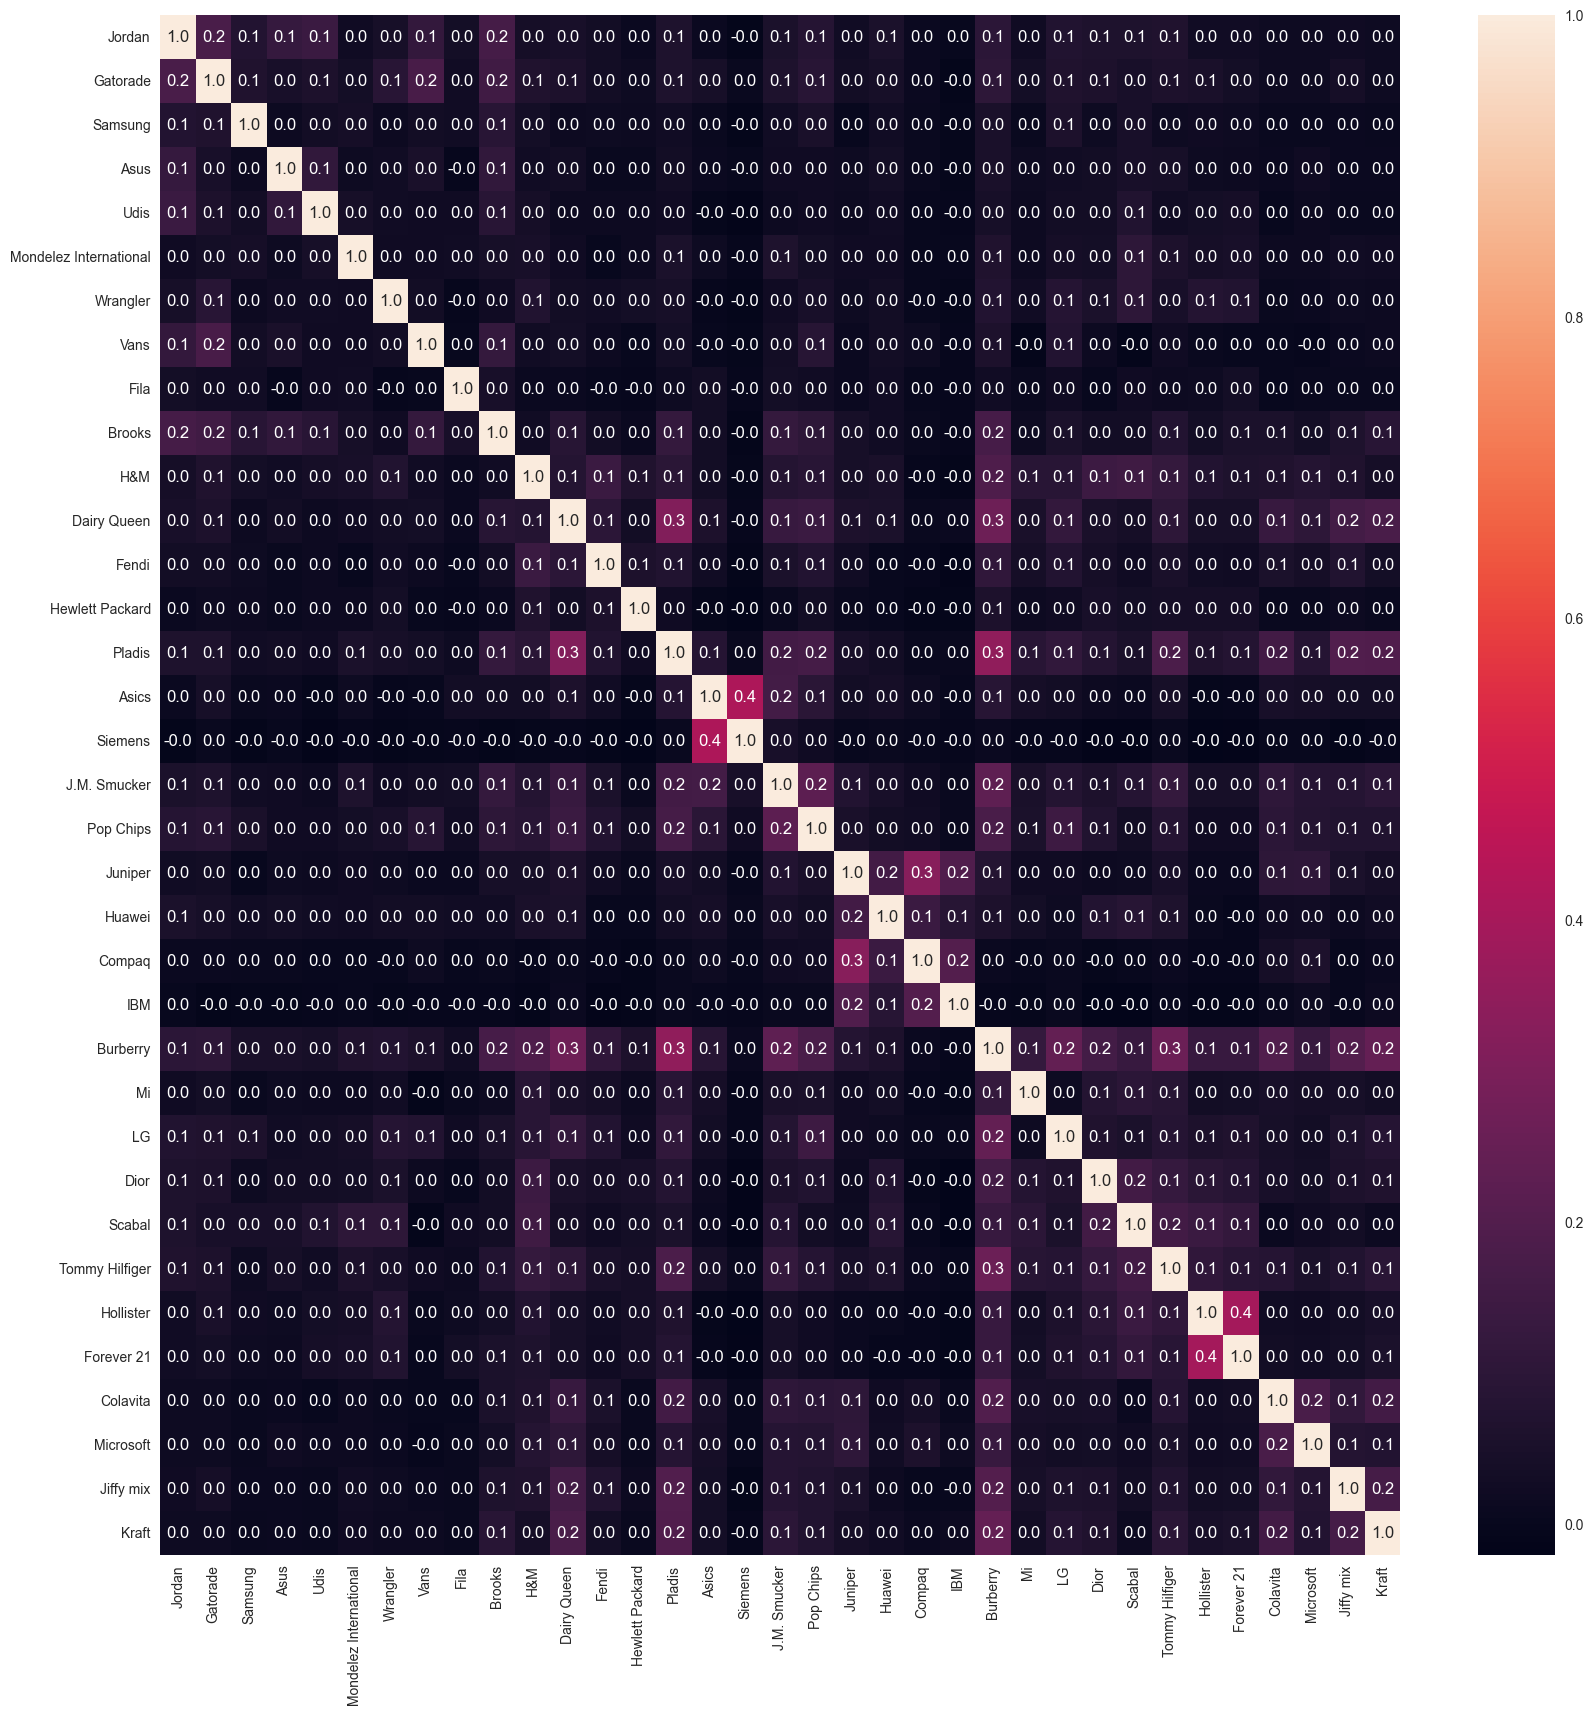

In [5]:
# ------------------------------------------------------------------
# CORRELOGRAM PLOT
# ------------------------------------------------------------------

plt.figure(figsize = (20, 20))
sns.heatmap(df.iloc[:, 3:].corr(),
            annot = True, fmt = '.1f')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

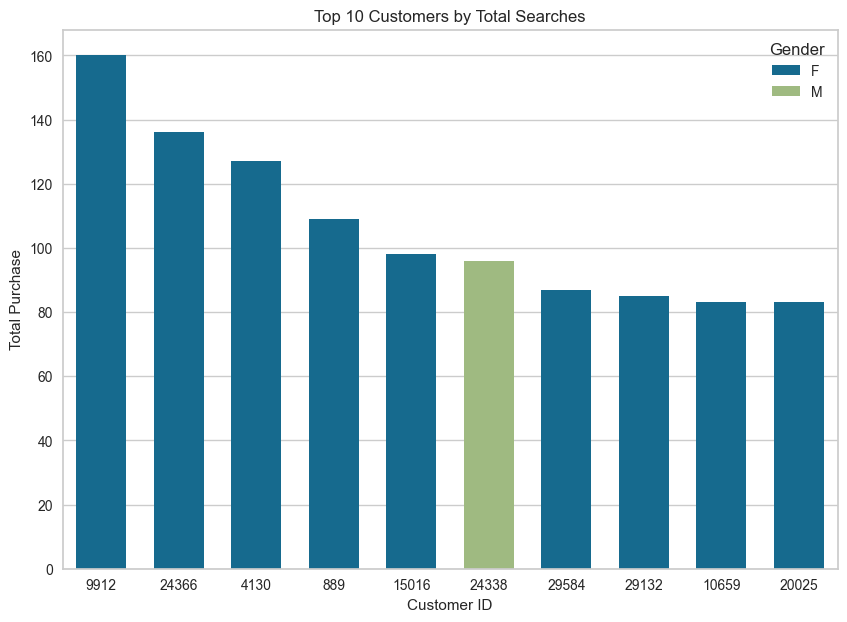

In [6]:
# ------------------------------------------------------------------
# TOP 10 CUSTOMERS BY TOTAL PURCHASE
# ------------------------------------------------------------------

# Sum Purchase made by each customer in each company
new_df = df.copy()
new_df['Total Search'] = new_df.iloc[:, 3:].sum(axis = 1)

plt_data = new_df.sort_values(
    'Total Search',
    ascending = False) [['Cust_ID',
                         'Gender',
                         'Total Search']].head(10)

plt.figure(figsize = (10, 7))
sns.barplot(data = plt_data,
            x = 'Cust_ID',
            y = 'Total Search',
            hue = 'Gender',
            order = plt_data.sort_values(
                'Total Search',
                ascending = False).Cust_ID,
                gap = 0.2)

plt.title('Top 10 Customers by Total Searches')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase')
plt.show


## ***Data Transformation 🔁🔁***

​	✅Data Scaling

In [7]:
x = df.iloc[:, 2:].values

scaler = MinMaxScaler()
features = scaler.fit_transform(x)

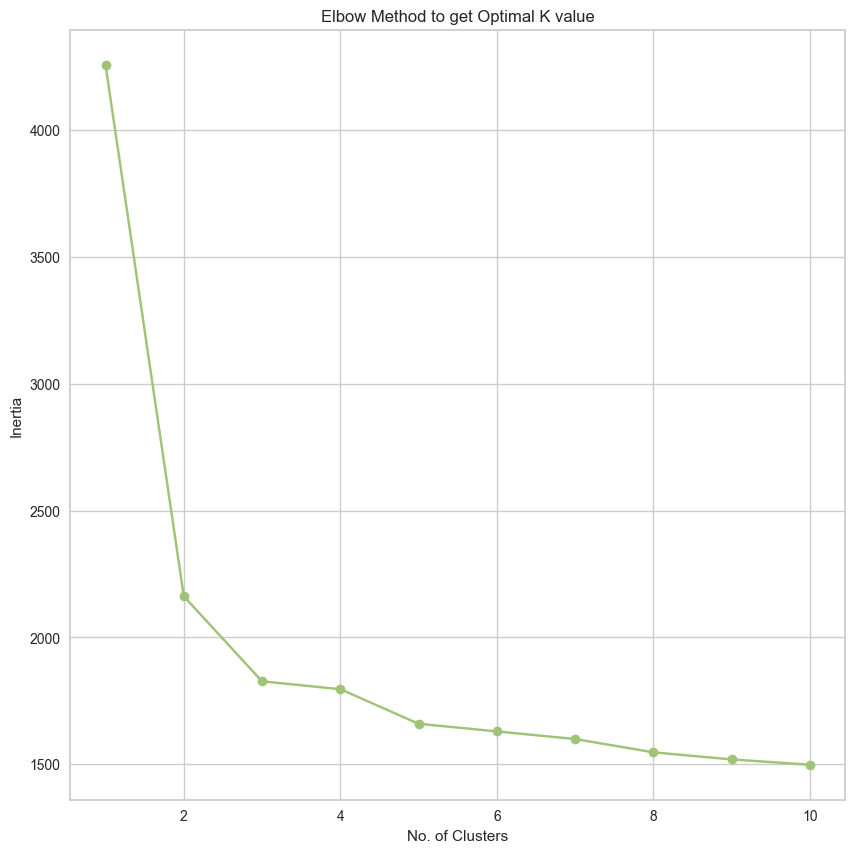

In [8]:
# ------------------------------------------------------------------
# ELBOW METHOD
# ------------------------------------------------------------------

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize = (10, 10))
plt.plot(range(1, 11), inertia, 'go-')
plt.title('Elbow Method to get Optimal K value')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

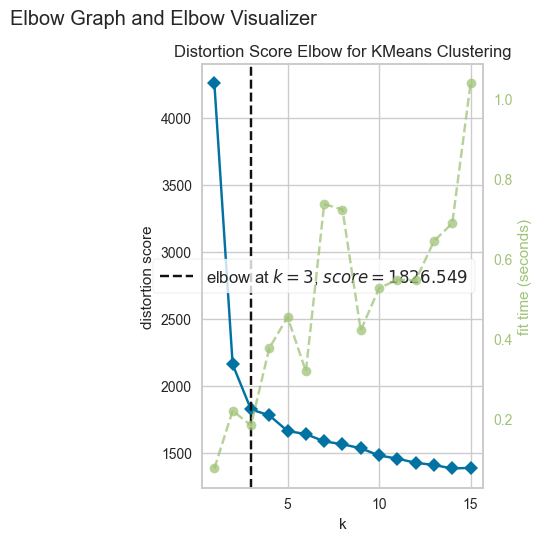

In [9]:
#Kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [10]:
# ------------------------------------------------------------------
# SILHOUETTE SCORE METHOD
# ------------------------------------------------------------------

silhouette_avg = []

for i in range(2, 16):
    kmeans2 = KMeans(n_clusters = i)
    cluster_labels = kmeans2.fit_predict(features)
    silhouette_avg.append(silhouette_score(features, cluster_labels))

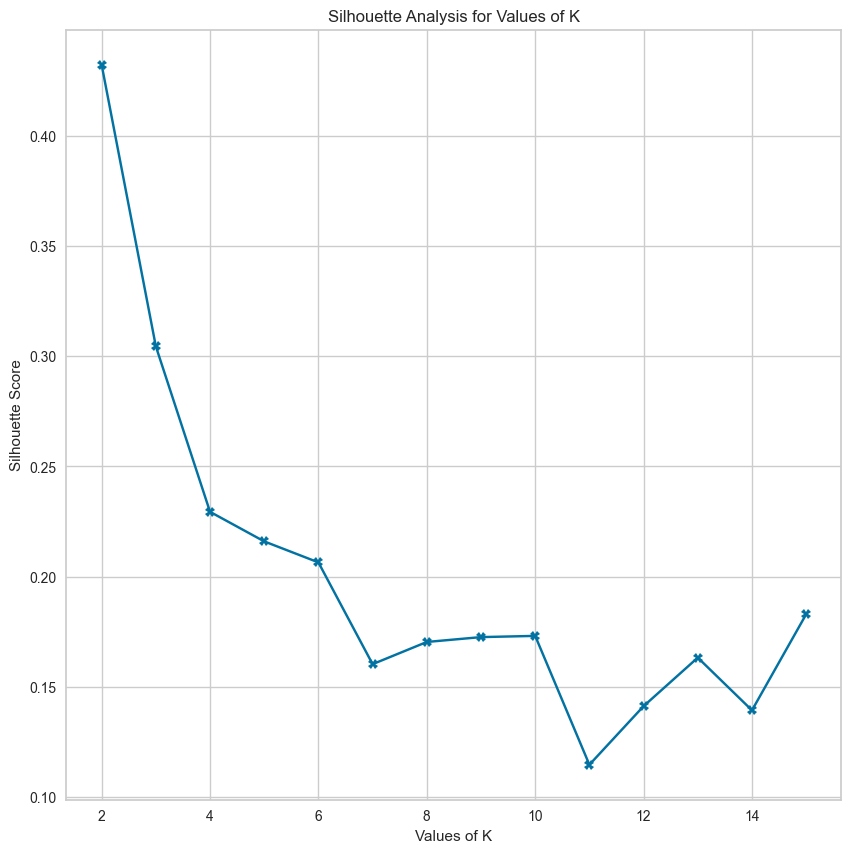

In [11]:
# Plot the results from Silhouette Method
plt.figure(figsize = (10, 10))
plt.plot(range(2, 16), silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Values of K')
plt.show()

## ***Model Fitting and Prediction 🟡 🟡***

​	✅Fit the Datasets into clusters

​	✅Predict Dataset Clusters

​	✅Explore Clusters

In [50]:
# Clusterize the data into 3 classes
model = KMeans(n_clusters = 3)
model = model.fit(features)

# Save the model
pickle.dump(model, open('kmeans_model.pickle', 'wb'))

# Load the model
model = pickle.load(open('kmeans_model.pickle', 'rb'))


In [13]:
# Predict Clusters and calculate centroids
y_pred = model.predict(features)
centres = model.cluster_centers_

# Add clusters to DF and save as CSV
df['Clusters'] = pd.DataFrame(y_pred)
df.to_csv('03 - Clusters/Cluster_data.csv', index = False)

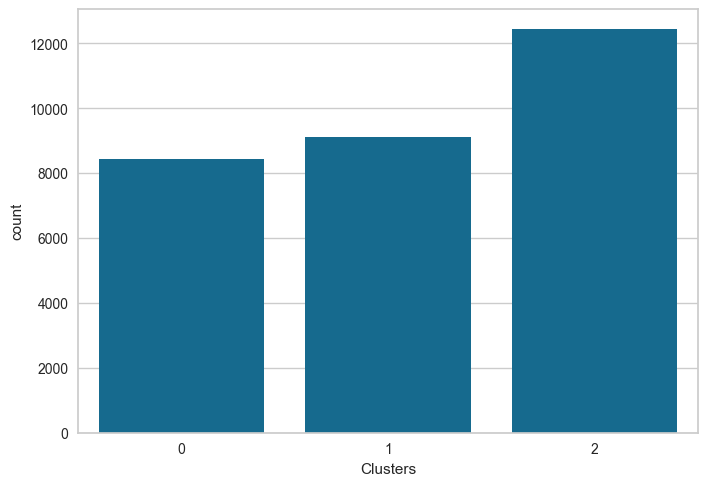

In [14]:
sns.countplot(data = df, x = 'Clusters')
plt.show()

In [33]:
# Get Column name and index
# for i in df.columns:
    # print(i, "-->", df.columns.get_loc(i))

df['Total Purchase'] = df.iloc[:, 3:37].sum(axis = 1)

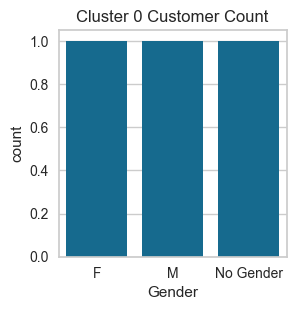

In [45]:
df_groups = df.groupby(
    ['Clusters', 'Gender'],
    as_index = False).sum().query('Clusters == 1')

plt.figure(figsize = (10, 10))
plt.subplot(3, 3, 1)
sns.countplot(
    data = df_groups.query('Clusters == 1'),
    x = 'Gender')
plt.title('Cluster 0 Customer Count')
plt.show()